# Dimensionality Reduction Methods

This section demonstrates the use of dimensionality reduction methods on various datasets to show the workings of each of the methods. The methods used in this section include Principal Component Analysis (PCA) and Kernel PCA. PCA is a linear dimensionality reduction method that is often applicable to very simple datasets and Kernel PCA is a nonlinear dimensionality reduction method that has a wider range of applicability. In the dimensionality reduction problems shown here, the main aim is to discover the intrinsic structure that is present within the data and represent that structure in a lower dimension than the original data.

To start off, the block of code below will import the required packages for this section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_swiss_roll, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

## Gaussian Clusters Dataset

The first dataset is the Gaussian clusters dataset that consists of two clusters of points in two dimensions. The block of code below will plot this dataset for a 1000 samples and fixed random state. The red and blue coloured points represent the two clusters. The aim of dimensionality reduction is to represent the structure of the data within a single dimension. The structure to look for in this data is that there are two separable clusters in the data which must be visible in the single dimension.

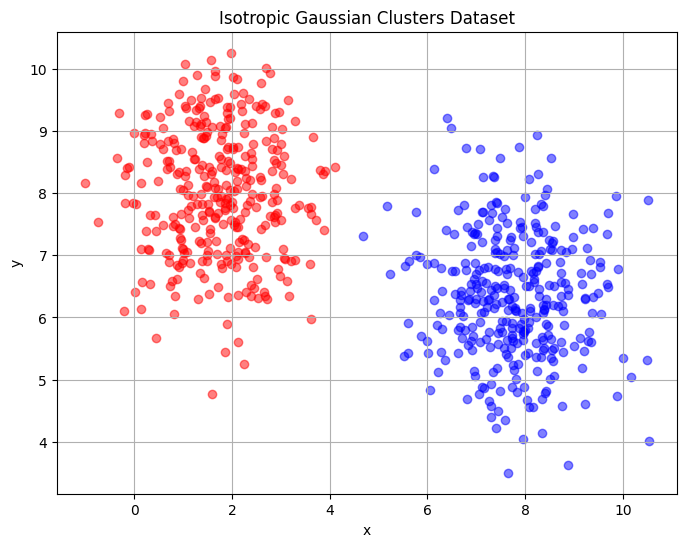

In [26]:
# Generating half moon shape dataset
X, y = make_blobs(n_samples=1000, random_state = 20)

# Plotting the dataset
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
ax.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
ax.set_title('Isotropic Gaussian Clusters Dataset')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.grid()

The block of code below uses PCA to reduce the dimension of the dataset to a single dimension. The plot shows the principal component that is obtained after dimensionality reduction and the y-coordinate of the plot is essentially zero since the data is one dimensional. The red and blue colours are still used to denote the points from each half of the original dataset. 

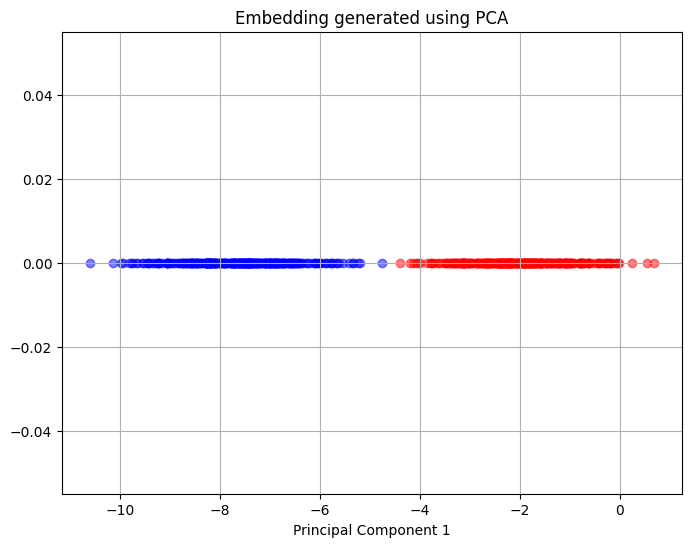

In [27]:
# Applying PCA to the dataset
transform = PCA(n_components = 1)
x_transform = transform.fit_transform(X)
x1 = x_transform[y==0, 0]
x2 = x_transform[y==1, 0]

# Plotting the embedding generated using PCA
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(x_transform[y==0, 0], np.zeros((x1.shape[0],1)), color='red', alpha=0.5)
ax.scatter(x_transform[y==1, 0], np.zeros((x2.shape[0],1)), color='blue', alpha=0.5)
ax.set_title('Embedding generated using PCA')
ax.set_xlabel('Principal Component 1')
ax.grid()

The plot above shows that in the single principal component chosen there is a clear separation between the points coming from each cluster of the dataset and PCA is able to fully separate the two clusters of the dataset. This means that PCA can represent the underlying structure that is present within the original dataset.

The next block of code will apply Kernel PCA to the dataset and creates a similar plot as the one created for PCA. This block of code using the radial basis function kernel for Kernel PCA.

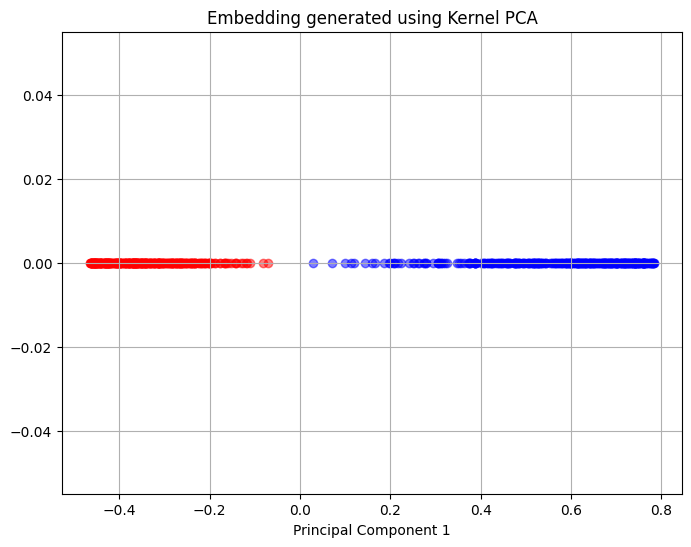

In [28]:
# Applying Kernel PCA to the dataset
transform = KernelPCA(n_components = 1, kernel = 'rbf', gamma = 0.25)
x_transform = transform.fit_transform(X)
x1 = x_transform[y==0, 0]
x2 = x_transform[y==1, 0]

# Plotting the embedding generated using PCA
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(x_transform[y==0, 0], np.zeros((x1.shape[0],1)), color='red', alpha=0.5)
ax.scatter(x_transform[y==1, 0], np.zeros((x2.shape[0],1)), color='blue', alpha=0.5)
ax.set_title('Embedding generated using Kernel PCA')
ax.set_xlabel('Principal Component 1')
ax.grid()

The above plot shows that Kernel PCA is able to separate the two clusters of the original data set as represented by a clear separation between the red and blue coloured points. This shows that Kernel PCA is able to discover the intrinsic structure of the data set and separate the two clusters originally present in the data. 

## Concentric Circles Dataset

The second data set used in this section is the concentric circles dataset. This is a noisy dataset that represents points within two concentric circles. Similar to the half-moon dataset, the intrinsic structure of the dataset is the two distinct circular regions present within the dataset that must be separated when the data is reduced to a single dimension. The block of code below generates 1000 samples from the noisy dataset and plots the samples in two dimensions.

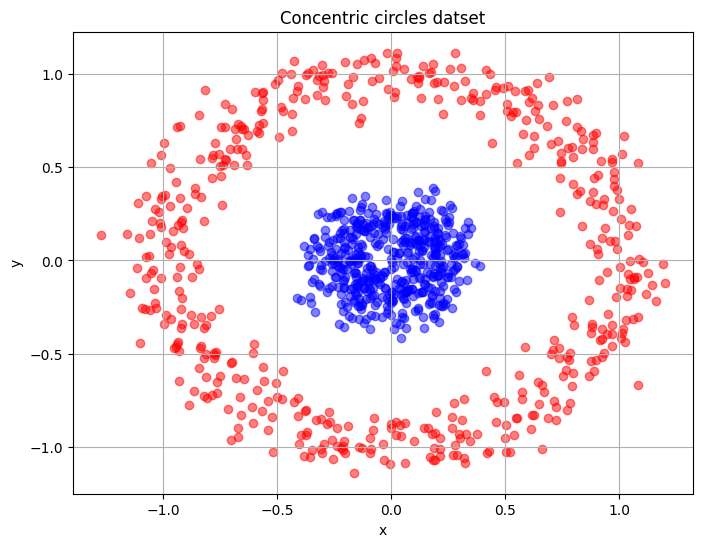

In [6]:
# Generating concentric circles dataset
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

# Plotting the dataset
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
ax.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
ax.set_title('Concentric circles datset')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.grid()

The next block of code will reduce the concentric circles dataset to a single dimension using PCA and a plot of the principal component obtained is shown.

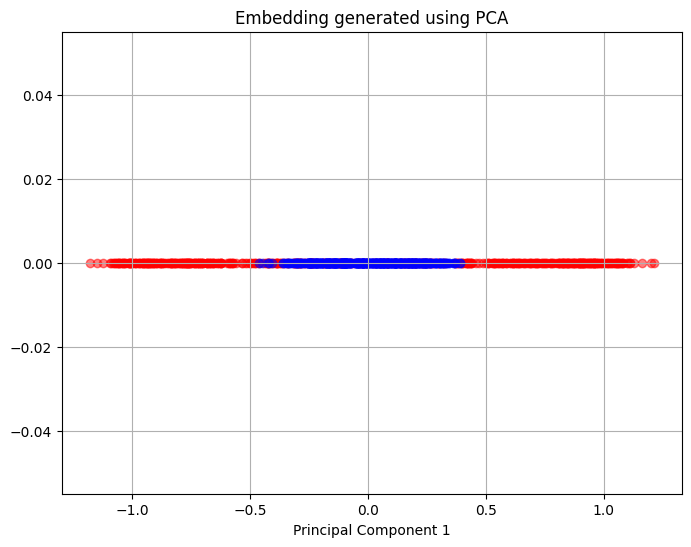

In [7]:
# Applying PCA to the dataset
transform = PCA(n_components = 1)
x_transform = transform.fit_transform(X)

# Plotting the embedding generated using PCA
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(x_transform[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
ax.scatter(x_transform[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
ax.set_title('Embedding generated using PCA')
ax.set_xlabel('Principal Component 1')
ax.grid()

Similar to the half moon dataset, PCA is unable to separate the points from the two circles and there is a significant overlap between the points in the single principal component that is obtained.

The block of code below will use Kernel PCA to reduce the dimension of the concentric circles dataset using the radial basis function as the kernel for reducing the dimension.

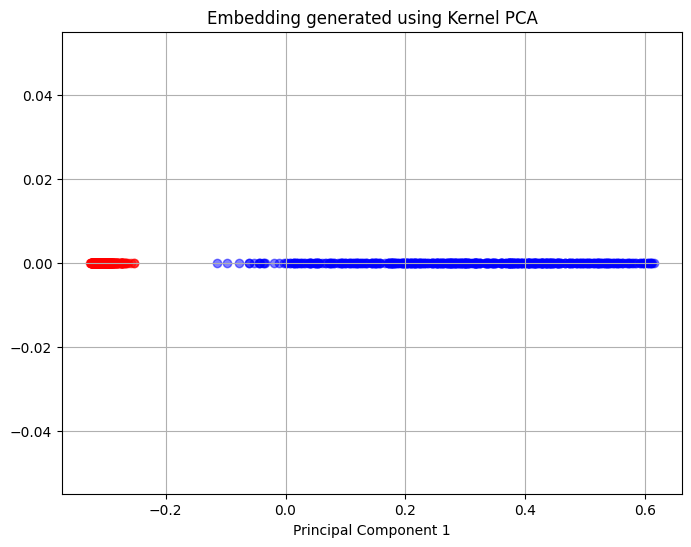

In [8]:
# Applying Kernel PCA to the dataset
transform = KernelPCA(n_components = 1, kernel = 'rbf', gamma = 15)
x_transform = transform.fit_transform(X)

# Plotting the embedding generated using PCA
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(x_transform[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
ax.scatter(x_transform[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
ax.set_title('Embedding generated using Kernel PCA')
ax.set_xlabel('Principal Component 1')
ax.grid()

Kernel PCA is able to separate the points from the two circles in the single principal component and therefore, can represent the intrinsic structure of the dataset within a single dimension. In general, both of these datasets have an intrinsic nonlinear that can be best represented using Kernel PCA rather than PCA. PCA will be more effective in simpler cases where the data has an intrinsic linear structure. It is, therefore, important to analyze the data that is being used to understand if there is an intrinsic structure to the data that is well-suited to a dimensionality reduction method.

## Swiss Roll Dataset

The final dataset is the swiss roll dataset that consists of points in three dimensions that form the shape of a swiss roll. The intrinsic structure within the data is that the swiss roll is actually a two dimensional plane that has been rolled into the shape of a swiss roll. A successful dimensionality reduction would be able to represent the two dimensional plane using two principal components. The block of code below generates 1500 samples from the dataset and creates a three dimensional scatter plot of the data. 

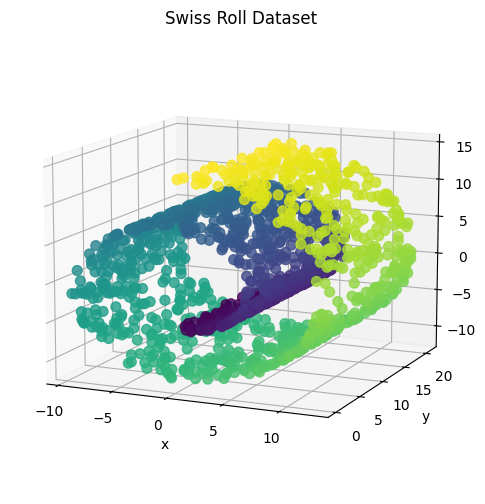

In [9]:
# Obtaining Swiss Roll dataset from scikit learn
sr_points, sr_color = make_swiss_roll(n_samples=1500, random_state=0)

# Plotting the dataset
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8)
ax.set_title("Swiss Roll Dataset")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(azim=-66, elev=12)

The next blocks of code apply PCA to reduce the dimension to two principal components and create a two dimensional scatter plot of the principal components. 

In [10]:
# Applying PCA to the data
transform = PCA(n_components=2)
xprime = transform.fit_transform(sr_points)

Text(0.5, 1.0, 'PCA Embedding of the Swiss Roll Function')

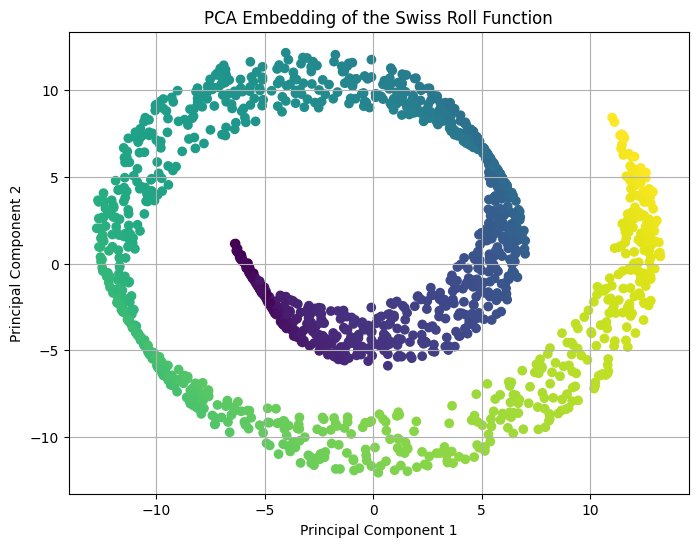

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xprime[:, 0], xprime[:, 1], c=sr_color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.grid()
ax.set_title("PCA Embedding of the Swiss Roll Function")

The above scatter plot of the principal componets shows that PCA is not able to discover the two dimensional plane the underlies the swiss roll dataset. In fact, it represents the swiss roll spiral directly in two dimensions which means it is unable to discover the underlying structure of the dataset. This was expected as the swiss roll dataset is a highly nonlinear dimensionality reduction problem and PCA is not well-suited to this dataset.

The next block of code applies Kernel PCA to the dataset and creates a plot of the principal components. The radial basis function kernel is used in this case as well.

In [12]:
# Applying Kernel PCA to the data
transform = KernelPCA(n_components=2, kernel='rbf', gamma = 0.01)
xprime = transform.fit_transform(sr_points)

Text(0.5, 1.0, 'Kernel PCA Embedding of the Swiss Roll Function')

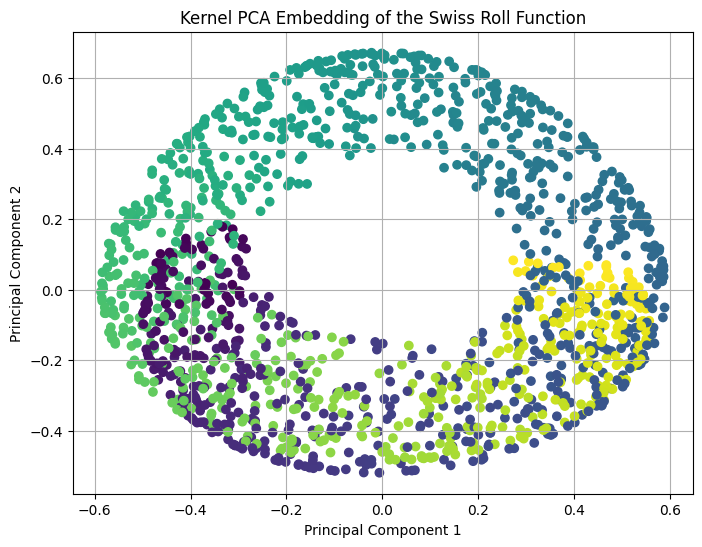

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xprime[:, 0], xprime[:, 1], c=sr_color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.grid()
ax.set_title("Kernel PCA Embedding of the Swiss Roll Function")

The above plot of the principal components shows that Kernel PCA could partially unravel the roll in the dataset and represent it in two dimensions. A full unraveling into a two dimensional plane would be taking the edges with the yellow coloured and purple coloured points and pulling them apart to create a two dimensional plane. However, Kernel PCA can only unravel it to the point that it appears similar to a circle in two dimensions. This shows that while Kernel PCA is a nonlinear method, it may not be well-suited for all nonlinear problems and in this case, a different dimensionality reduction method is required to fully represent the intrinsic structure of the swiss roll dataset. Examples of dimensionality reduction methods that could prove more effective in this case are isometric mapping (IsoMap) and locally linear embedding (LLE).